## ***`01:` Relevant Imports***

In [1]:
# Import Packages
import pandas as pd
import seaborn as sns

In [2]:
# Load Dataset
penguins = sns.load_dataset('penguins')

# Examine Random 10 rows of the dataset
penguins.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
175,Chinstrap,Dream,50.6,19.4,193.0,3800.0,Male
201,Chinstrap,Dream,49.8,17.3,198.0,3675.0,Female
197,Chinstrap,Dream,50.8,18.5,201.0,4450.0,Male
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
170,Chinstrap,Dream,46.4,18.6,190.0,3450.0,Female
111,Adelie,Biscoe,45.6,20.3,191.0,4600.0,Male
230,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,Female
35,Adelie,Dream,39.2,21.1,196.0,4150.0,Male
110,Adelie,Biscoe,38.1,16.5,198.0,3825.0,Female
69,Adelie,Torgersen,41.8,19.4,198.0,4450.0,Male


## ***`02:` Data Cleaning***
#### We are focusing our analysis on Adelie and Gentoo Penguins, and will drop any missing values from the dataset. We would typically examine the data more thoroughly before deciding how to handle missing data (i.e., fill in, drop etc.);

In [3]:
# Check for the different species of penguins
species_types = penguins['species'].unique()
print('Different Species Type: ', species_types, '\n')

# Check for the count of different species of penguins
species_count = penguins['species'].value_counts()
print('Different Species Counts: ', '\n', species_count)

Different Species Type:  ['Adelie' 'Chinstrap' 'Gentoo'] 

Different Species Counts:  
 species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


In [4]:
# Keep Adelie and Gentoo penguins, drop missing values
penguins_sub = penguins[penguins['species'] != 'Chinstrap']
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace = True, drop = True)

## ***`03:` Exploratory Data Analysis***
#### As we focus on SIMPLE LINEAR REGRESSION, we want to check for any linear relationships among variables in the dataframe. We can do this by creating scatterplots using any data visualisation package, for example, matplotlib.plt, seaborn, or plotly;

#### To visualise more than ONE relationship at the same time, we use the 'PAIRPLOT()' function from the 'SEABORN' package to create a Scatterplot Matrix;

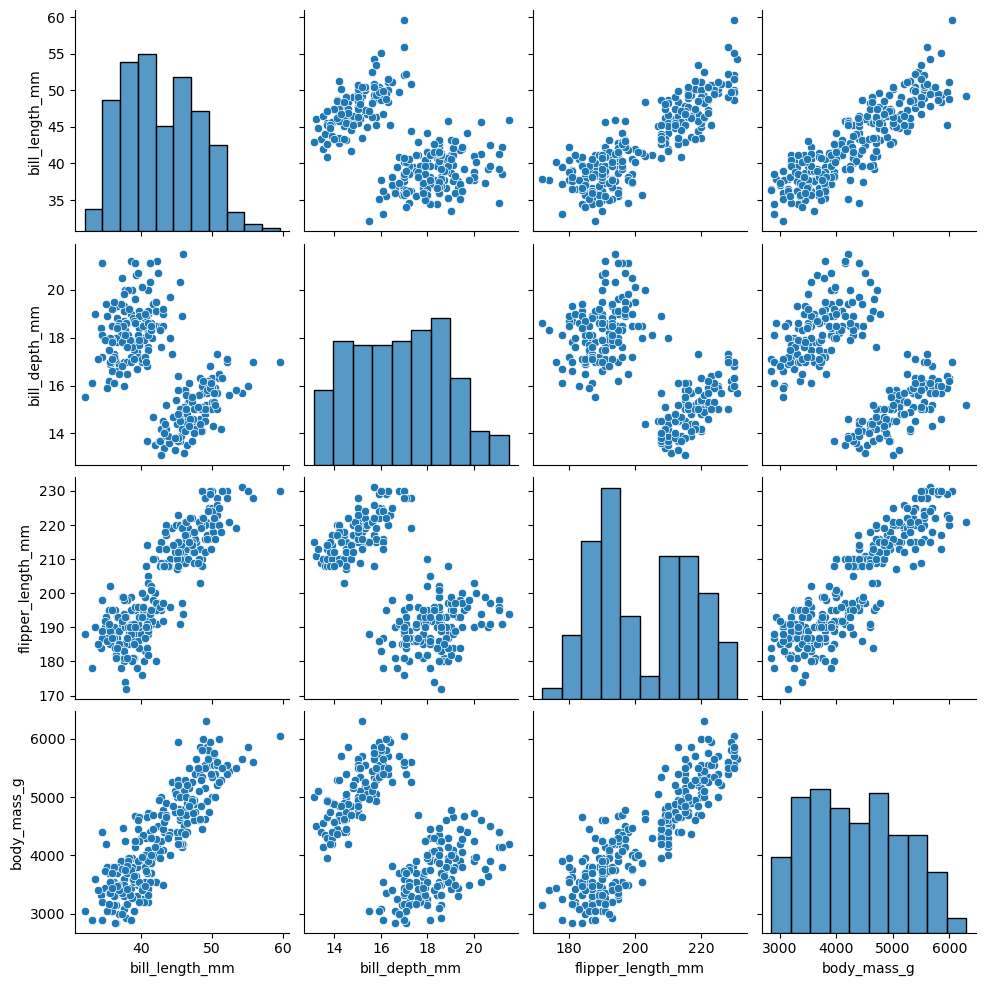

In [5]:
# Create PairWise ScatterPlot of Data Set
sns.pairplot(penguins_final)

### **From the ScatterPlot matrix, we can observe a few Linear Relationships:**
#### ***01:*** *`'bill_length_mm'` & `'body_mass_g'`*
#### ***02:*** *`'flipper_length_mm'` & `'body_mass_g'`*
#### ***03:*** *`'bill_length_mm'` & `'flipper_length_mm'`*


## ***`04:` Model Construction***
#### Based on the above scatterplots, we could probably run a Simple Linear Regression on any of the THREE relationships identified. Here we will focus on ~ 'bill_length_mm' & 'body_mass_g';

#### We will first SUBSET the Variables of Interest from the dataset. We can do so using Double Square Brackets- '[[]]' and listing the columns of interest;

In [6]:
# SubSet Data
ols_data = penguins_final[['bill_length_mm', 'body_mass_g']]
ols_data.sample(5)

,bill_length_mm,body_mass_g
229,50.8,5600.0
168,46.5,4400.0
32,42.2,3550.0
204,50.4,5550.0
76,36.7,3800.0


#### *Next, we can construct the Linear Regression formula, and save it as a STRING. The 'y': Dependent Variable comes before the ~ and the 'x': Independent Variable comes after the ~*

In [7]:
# Write the Formula
ols_formula = "body_mass_g ~ bill_length_mm"

#### *Lastly, we can build a Simple Linear Regression model in `statsmodels` using the `ols` function. We can import `ols()` function directly from python library import function* 

In [8]:
from statsmodels.formula.api import ols 

#### *Then, we can plug in the 'ols_formula' and 'ols_data' as arguments in the `ols()` function. After we save the result as a variable, we can call on the `fit()` function to fit the model data*

In [9]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

#### *Lastly, we can call the `summary()` function on the `model` object to get the coefficients and more statistics about the model. The output from `model.summary()` can be used to interpret the model. We will go over how to read the results of the output.*

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           1.33e-85
Time:                        09:41:46   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### *We can use the `regplot()` function from seaborn to visualize the `regression line` of our `model`.*

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

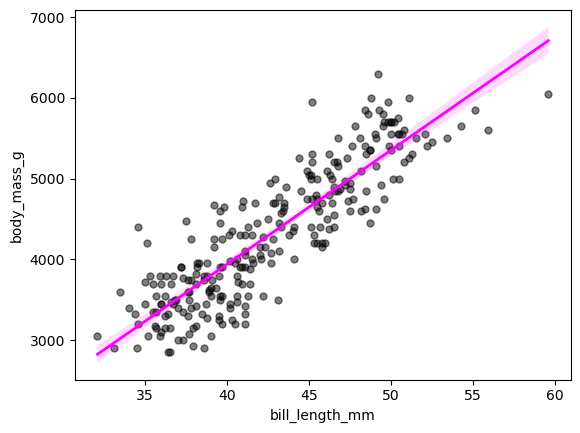

In [11]:
sns.regplot(x = 'bill_length_mm', y = 'body_mass_g', data = ols_data, 
           scatter_kws = {'color': 'black', 's' : 25, 'alpha' : 0.5},
            line_kws = {'color': 'magenta', 'linewidth': 2})

## ***`Finish Checking Model Assumption`***

### **There are FOUR Model Assumptions for Simple Linear Regression:**
#### *01: Linearity*
#### *02: Normality*
#### *03: Independent Observations*
#### *04: Homoscedasticity*

#### *We have already checked the `linearity` assumption by creating the scatterplot matrix;*

#### *The `independent observations` assumption is more about data collection. There is no reason to believe that one **penguin's body mass** or **bill length** would be related to any other penguin's anatomical measurements. So we can check off assumptions `1` and `3`;*

#### *The `normality` and `homoscedasticity` assumptions focus on the distribution of errors. Thus, we can only check these assumptions after we have constructed the model. To check these assumptions, we will check the residuals, as a `approximation of the errors`;*

#### *To more easily check the `model assumptions` and create `relevant visualisations`, we can first subset the X variable by isolating just the `bill_length_mm` column. Additionally, we can save the predicted values from the model using **model.predict(X)** fucntion;*

In [12]:
# Subset X Variable
X = ols_data['bill_length_mm']

# Get predictions from model
fitted_values = model.predict(X)

#### *Thus, we can save the model residuals as a variable by using the **model.resid** attribute;*

In [13]:
residuals = model.resid

## ***`Check the NORMALITY Assumption`***

#### *To check the normality assumption, we can create a histogram of the residuals using the `histogram()` function from the `seaborn` package.*

#### *From the below HISTOGRAM, we may notice that the RESIDUALS are NORMALLY DISTRIBUTED. In this case, it is a likely `close enough` that the `assumption is met`;*

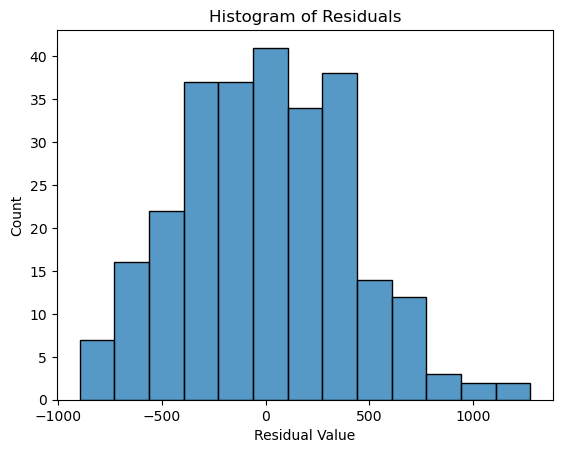

In [14]:
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel('Residual Value')
fig.set_title('Histogram of Residuals')
plt.show()

#### *Another way to check the NORMALITY function is to create a Q-Q Plot. If the RESIDUALS are NORMALLY DISTRIBUTED, we would expect a straight diagonal line going from the BOTTOM LEFT to the UPPER RIGHT of the Q-Q Plot. We can create a Q-Q Plot by using `QQPLOT` function from the `statsmodels.api` package;*

#### *The Q-Q Plot shows a similar pattern to the histogram, where the residuals are mostly NORMALLY distributed, except at the ends of the distribution;*

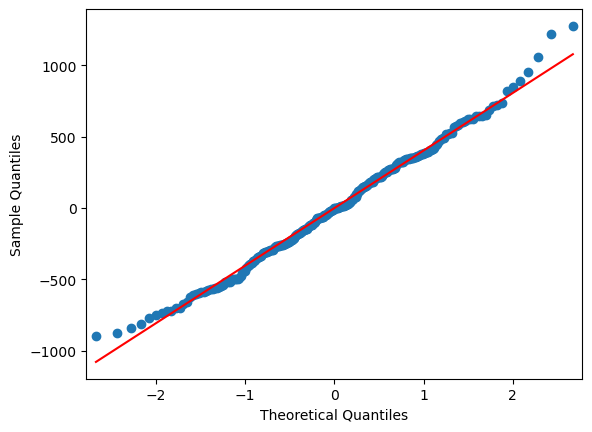

In [15]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig = sm.qqplot(model.resid, line = 's')
plt.show()

## ***`Check the HOMOSCEDASTICITY Assumption`***

#### *To check the homoscedasticity assumption, we can create a scatterplot of the filled values and residuals. If the plot resembles a random cloud (i.e, the residuals are scattered randomly), then the assumption is LIKELY MET;*

#### *We can create one scatterplot by using the `scatterplot()` function from the `seaborn` package. The first argument is the variable that goes on the X-AXIS. The second argument is the variable that goes on the Y-AXIS;*

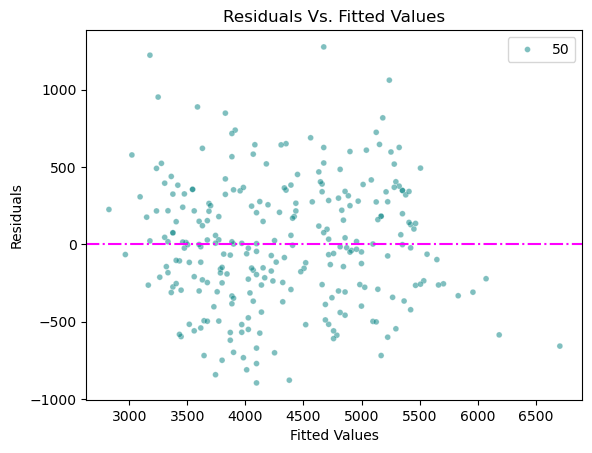

In [16]:
fig = sns.scatterplot(x = fitted_values, y = residuals, color = 'teal', alpha = 0.5, size = 50)

# Add reference line at residuals = 0
fig.axhline(0, color = 'magenta', linestyle = 'dashdot')

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Residuals Vs. Fitted Values")

# Show the Plot
plt.show()